# Week 17
## Ensemble Learning and Random Forest

In [3]:
# Dependencies and modules:

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours

from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline

from sklearn.metrics import classification_report, roc_curve, roc_auc_score

import matplotlib.pyplot as plt

from sklearn.svm import SVC

# diabetes.csv file:

diabetes_path = "C:/Users/Nik/Documents/diabetes.csv"
diabetes_df = pd.read_csv(diabetes_path)
diabetes_df.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1


## Warm-up

* What are underfitting and overfitting? How do you avoid them?

Underfitting your data is when your model is not closely predicting your true values. Overfitting is when your model too closely predicts your true values, or exactly mirrors your test data. You can avoid this practices with several techniques: Underfitting is best combated by limiting how much standardization you are doing, or increasing your amount of test data. Overfitting your data can be avoided by balancing the highest accuracy with the lowest k value if runnng K-NN

* What is cross validation?

Cross-validation is a resampling procedure used to evaluate a model on a limited data samplein order to estimate how the model is expected to perform on data not used during the training of the model.

### Regarding model complexity, there IS a sweet spot before model complexity reduces accuracy of test data.

In [8]:
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [9]:
from sklearn.ensemble import RandomForestClassifier

# estimator = model

rf = RandomForestClassifier(n_estimators=200, random_state=42)

rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.7619047619047619

In [10]:
predictions = rf.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       151
           1       0.66      0.64      0.65        80

    accuracy                           0.76       231
   macro avg       0.74      0.73      0.73       231
weighted avg       0.76      0.76      0.76       231



In [11]:
print(rf.feature_importances_, X.columns)

[0.07940791 0.27630997 0.08567884 0.07008879 0.06998766 0.16022449
 0.11341283 0.14488951] Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


In [20]:
from sklearn.metrics import classification_report, plot_confusion_matrix
import pydotplus

from matplotlib import pyplot as plt
from sklearn import tree
from IPython.display import Image

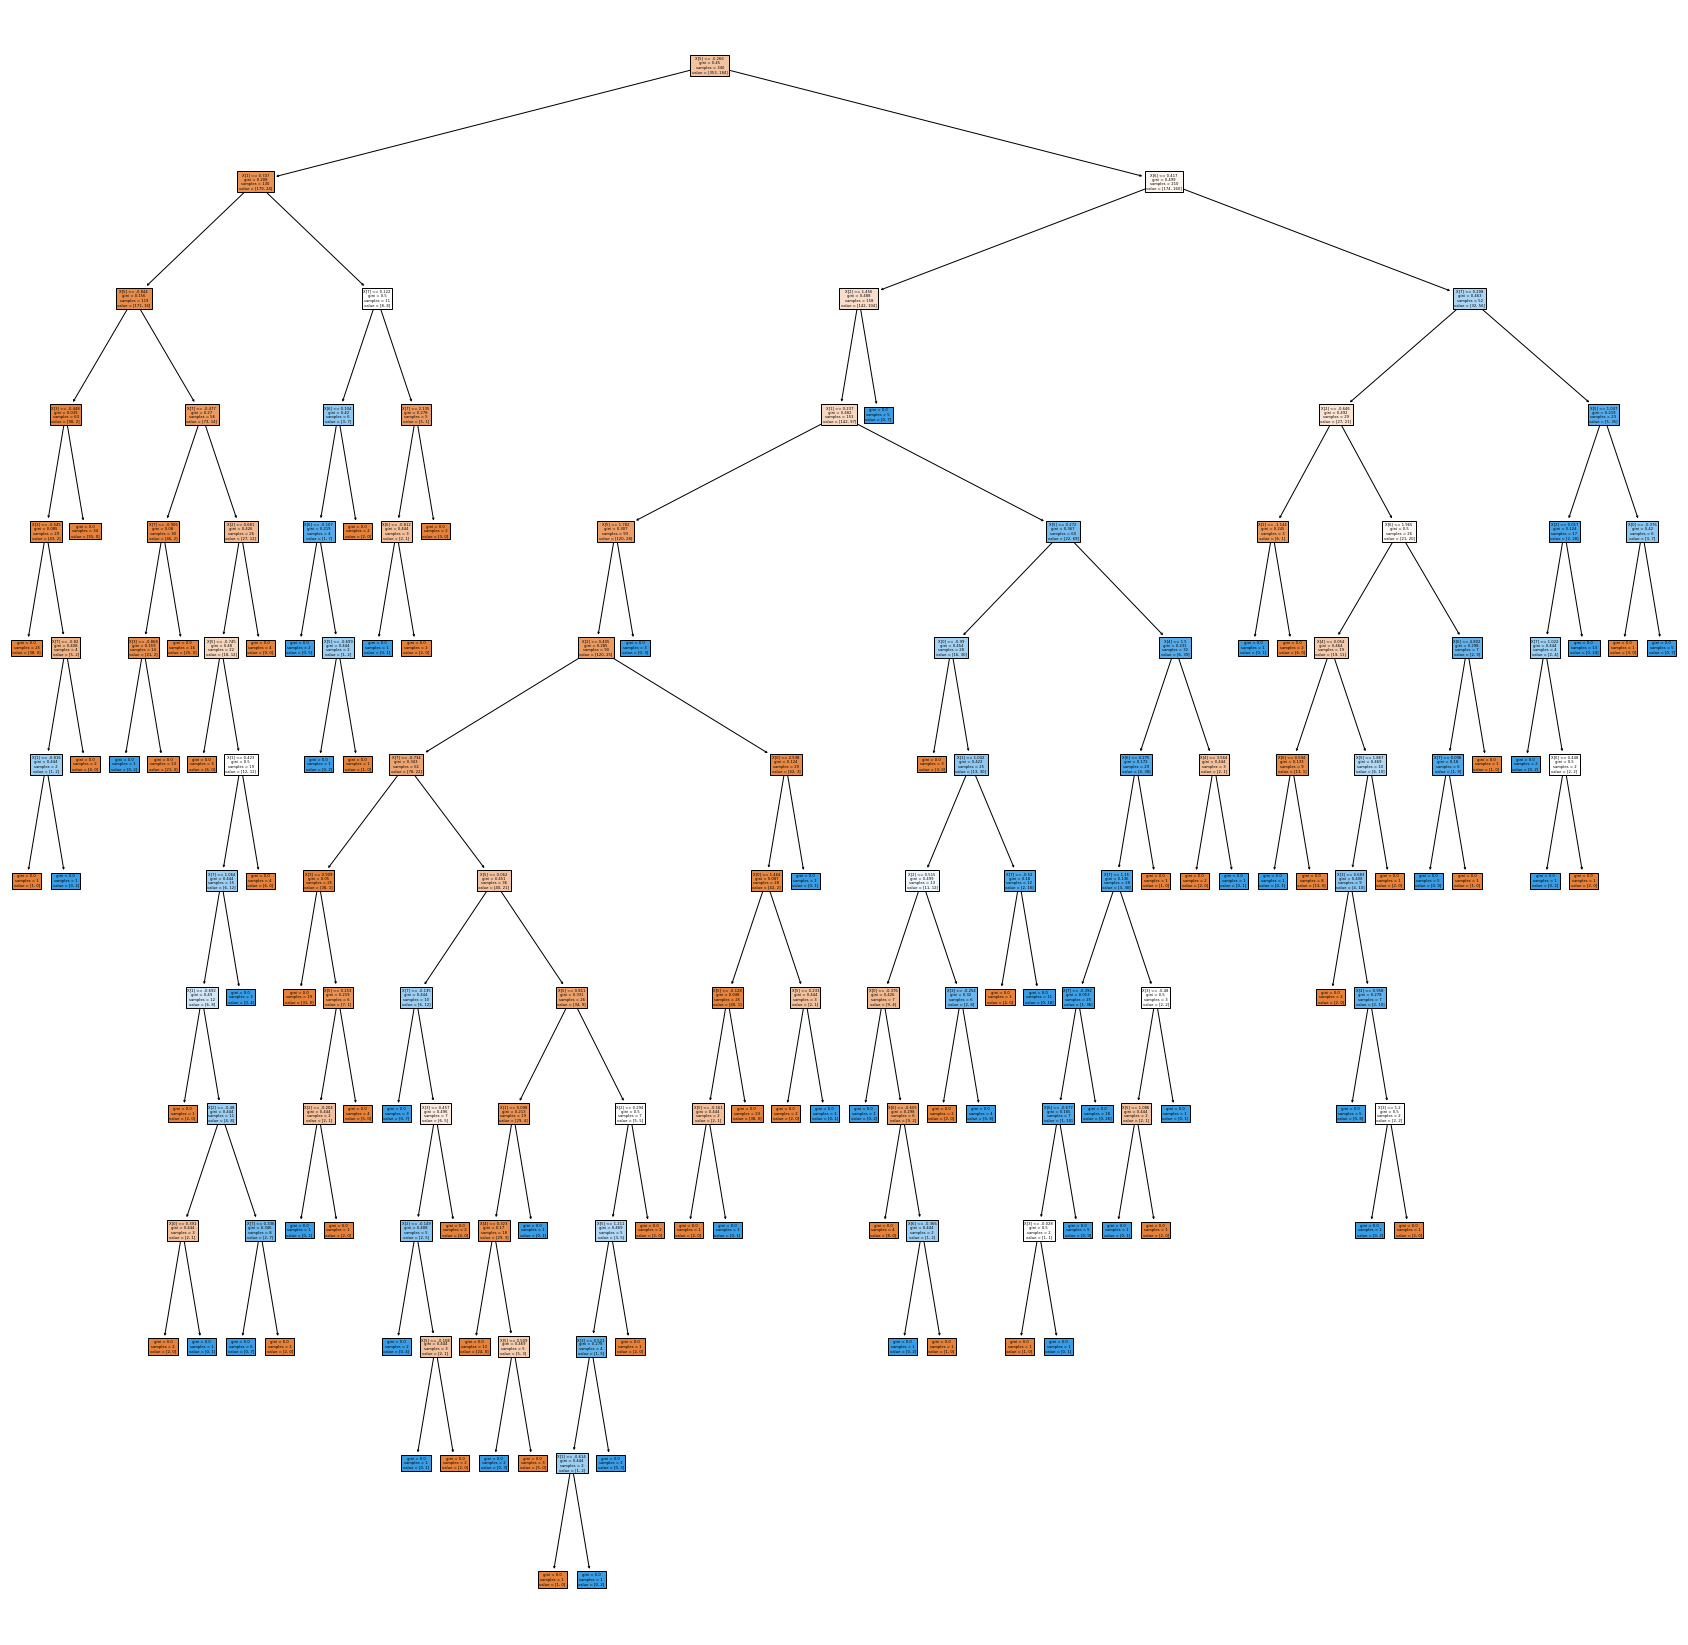

In [21]:
#pull out a single tree
tree_10 = rf.estimators_[9]

fig = plt.figure(figsize=(30,30))
fig = tree.plot_tree(tree_10, filled=True)
plt.savefig("tree10.svg")
plt.show()

In [22]:
from xgboost import XGBClassifier

In [23]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
print(classification_report(y_test, y_pred))

C:\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:14:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       151
           1       0.66      0.65      0.65        80

    accuracy                           0.76       231
   macro avg       0.74      0.74      0.74       231
weighted avg       0.76      0.76      0.76       231



In [24]:
from sklearn.metrics import roc_curve, roc_auc_score

